In [4]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
voronoi = sc.read_h5ad('../data/xenium/outs/final_adatas/adata_voronoi_binning_stats.h5ad')

voronoi_tresholded = sc.read_h5ad('../data/xenium/outs/final_adatas/adata_voronoi_binning_tresholded_stats.h5ad')

voronoi_tresholded_buffered = sc.read_h5ad("../data/xenium/outs/final_adatas/adata_voronoi_binning_tresholded_buffered_stats.h5ad")

stardist = sc.read_h5ad('../data/xenium/outs/final_adatas/adata_stardist_binning_stats.h5ad')

In [184]:
stardist_buffered = sc.read_h5ad('../data/xenium/outs/final_adatas/adata_stardist_binning_buffered_stats.h5ad')

In [185]:
folder = '../data/xenium/outs/'

# Read the data
adata = sc.read_10x_h5(folder + 'cell_feature_matrix.h5')

# Load the cell type annotations
cell_type_df = pd.read_csv(folder + 'insitu_replicate_1_annotation.csv', index_col=0)

# Ensure index consistency and add 'cell_type' to adata
cell_type_df.index = cell_type_df.index.astype(str)
adata.obs['cell_type'] = cell_type_df['Cluster']

# Load additional metadata and add centroid coordinates to adata
cell_meta_df = pd.read_csv(folder + 'cells.csv', index_col=0)
cell_meta_df.index = cell_meta_df.index.astype(str)
adata.obs[['x_centroid', 'y_centroid']] = cell_meta_df[['x_centroid', 'y_centroid']]
adata.obs['cell_id'] = cell_meta_df.index

# Filter out unlabeled cells
adata = adata[adata.obs['cell_type'] != 'Unlabeled']

In [186]:
adata

View of AnnData object with n_obs × n_vars = 159226 × 313
    obs: 'cell_type', 'x_centroid', 'y_centroid', 'cell_id'
    var: 'gene_ids', 'feature_types', 'genome'

In [187]:
voronoi.obs['cell_id'] = voronoi.obs['cell_id'].astype(float)
voronoi.obs['cell_id'] = voronoi.obs['cell_id'].astype(int)

voronoi_tresholded.obs['cell_id'] = voronoi_tresholded.obs['cell_id'].astype(float)
voronoi_tresholded.obs['cell_id'] = voronoi_tresholded.obs['cell_id'].astype(int)

voronoi_tresholded_buffered.obs['cell_id'] = voronoi_tresholded_buffered.obs['cell_id'].astype(float)
voronoi_tresholded_buffered.obs['cell_id'] = voronoi_tresholded_buffered.obs['cell_id'].astype(int)

stardist.obs['cell_id'] = stardist.obs['cell_id'].astype(float)
stardist.obs['cell_id'] = stardist.obs['cell_id'].astype(int)

In [188]:
stardist_buffered.obs['cell_id'] = stardist_buffered.obs['cell_id'].astype(float)
stardist_buffered.obs['cell_id'] = stardist_buffered.obs['cell_id'].astype(int)

In [189]:
voronoi_obs_df = voronoi.obs
voronoi_df = voronoi_obs_df[['cell_id', 'CellType', 'realCellType']].copy()
voronoi_df = voronoi_df.drop_duplicates(subset='cell_id')


voronoi_tresholded_obs_df = voronoi_tresholded.obs
voronoi_tresholded_df = voronoi_tresholded_obs_df[['cell_id', 'CellType', 'realCellType']].copy()
voronoi_tresholded_df = voronoi_tresholded_df.drop_duplicates(subset='cell_id')

voronoi_tresholded_buffered_obs_df = voronoi_tresholded_buffered.obs
voronoi_tresholded_buffered_df = voronoi_tresholded_buffered_obs_df[['cell_id', 'CellType', 'realCellType']].copy()
voronoi_tresholded_buffered_df = voronoi_tresholded_buffered_df.drop_duplicates(subset='cell_id')

stardist_obs_df = stardist.obs
stardist_df = stardist_obs_df[['cell_id', 'CellType', 'realCellType']].copy()
stardist_df = stardist_df.drop_duplicates(subset='cell_id')

In [190]:
stardist_buffered_obs_df = stardist_buffered.obs
stardist_buffered_df = stardist_buffered_obs_df[['cell_id', 'CellType', 'realCellType']].copy()
stardist_buffered_df = stardist_buffered_df.drop_duplicates(subset='cell_id')

In [191]:
# Convert 'cell_id' in adata to string (if needed)
adata.obs['cell_id'] = adata.obs['cell_id'].astype(int)

/var/folders/fd/jw2fvp1178s0spb_1sy9f51h0000gn/T/ipykernel_64290/1795972567.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['cell_id'] = adata.obs['cell_id'].astype(int)


In [192]:
merged_df = adata.obs.merge(voronoi_df, on='cell_id', how='left')



In [193]:
merged_df = merged_df.rename(columns={
    'CellType': 'voronoi_cell_type',
    'realCellType': 'voronoi_cell_type_real'
})
merged_df

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN
...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1


In [194]:
merged_df2 = merged_df.merge(stardist_df, on='cell_id', how='left')

In [195]:
merged_df2 = merged_df2.rename(columns={
    'CellType': 'stardist_cell_type',
    'realCellType': 'stardist_cell_type_real'
})
merged_df2

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real,stardist_cell_type,stardist_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN,Prolif_Invasive_Tumor,DCIS_1
...,...,...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2,NaN,NaN
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1,NaN,NaN


In [196]:
merged_df3 = merged_df2.merge(voronoi_tresholded_df, on='cell_id', how='left')
merged_df3 = merged_df3.rename(columns={
    'CellType': 'voronoi_tresholded_cell_type',
    'realCellType': 'voronoi_tresholded_cell_type_real'
})
merged_df3

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real,stardist_cell_type,stardist_cell_type_real,voronoi_tresholded_cell_type,voronoi_tresholded_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN,NaN,NaN,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN,NaN,NaN,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN,NaN,NaN,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN,NaN,NaN,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN,Prolif_Invasive_Tumor,DCIS_1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN,NaN,NaN,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN,NaN,NaN,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2,NaN,NaN,DCIS_2,DCIS_2
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1,NaN,NaN,DCIS_2,DCIS_1


In [197]:
merged_df4 = merged_df3.merge(voronoi_tresholded_buffered_df, on='cell_id', how='left')
merged_df4 = merged_df4.rename(columns={
    'CellType': 'voronoi_tresholded_buffered_cell_type',
    'realCellType': 'voronoi_tresholded_buffered_cell_type_real'
})
merged_df4

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real,stardist_cell_type,stardist_cell_type_real,voronoi_tresholded_cell_type,voronoi_tresholded_cell_type_real,voronoi_tresholded_buffered_cell_type,voronoi_tresholded_buffered_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN,Prolif_Invasive_Tumor,DCIS_1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2,NaN,NaN,DCIS_2,DCIS_2,DCIS_2,DCIS_2
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1,NaN,NaN,DCIS_2,DCIS_1,DCIS_2,DCIS_1


In [198]:
merged_df5 = merged_df4.merge(stardist_buffered_df, on='cell_id', how='left')
merged_df5 = merged_df5.rename(columns={
    'CellType': 'stardist_buffered_cell_type',
    'realCellType': 'stardist_buffered_cell_type_real'
})
merged_df5

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real,stardist_cell_type,stardist_cell_type_real,voronoi_tresholded_cell_type,voronoi_tresholded_cell_type_real,voronoi_tresholded_buffered_cell_type,voronoi_tresholded_buffered_cell_type_real,stardist_buffered_cell_type,stardist_buffered_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN,Prolif_Invasive_Tumor,DCIS_1,NaN,NaN,NaN,NaN,DCIS_1,DCIS_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2,NaN,NaN,DCIS_2,DCIS_2,DCIS_2,DCIS_2,DCIS_2,DCIS_2
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1,NaN,NaN,DCIS_2,DCIS_1,DCIS_2,DCIS_1,NaN,NaN


In [199]:
adata.obs = merged_df5

In [200]:
adata.obs

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real,stardist_cell_type,stardist_cell_type_real,voronoi_tresholded_cell_type,voronoi_tresholded_cell_type_real,voronoi_tresholded_buffered_cell_type,voronoi_tresholded_buffered_cell_type_real,stardist_buffered_cell_type,stardist_buffered_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN,Prolif_Invasive_Tumor,DCIS_1,NaN,NaN,NaN,NaN,DCIS_1,DCIS_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2,NaN,NaN,DCIS_2,DCIS_2,DCIS_2,DCIS_2,DCIS_2,DCIS_2
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1,NaN,NaN,DCIS_2,DCIS_1,DCIS_2,DCIS_1,NaN,NaN


In [201]:
adata.obs['voronoi_cell_type'] = adata.obs['voronoi_cell_type'].replace('NA', 'not_selected')

In [202]:
adata.obs['stardist_cell_type'] = adata.obs['stardist_cell_type'].replace('NA', 'not_selected')

In [203]:
adata.obs['voronoi_tresholded_cell_type'] = adata.obs['voronoi_tresholded_cell_type'].replace('NA', 'not_selected')
adata.obs['voronoi_tresholded_buffered_cell_type'] = adata.obs['voronoi_tresholded_buffered_cell_type'].replace('NA', 'not_selected')

In [204]:
adata.obs['stardist_buffered_cell_type'] = adata.obs['stardist_buffered_cell_type'].replace('NA', 'not_selected')

In [205]:
adata.obs

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real,stardist_cell_type,stardist_cell_type_real,voronoi_tresholded_cell_type,voronoi_tresholded_cell_type_real,voronoi_tresholded_buffered_cell_type,voronoi_tresholded_buffered_cell_type_real,stardist_buffered_cell_type,stardist_buffered_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN,Prolif_Invasive_Tumor,DCIS_1,NaN,NaN,NaN,NaN,DCIS_1,DCIS_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2,NaN,NaN,DCIS_2,DCIS_2,DCIS_2,DCIS_2,DCIS_2,DCIS_2
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1,NaN,NaN,DCIS_2,DCIS_1,DCIS_2,DCIS_1,NaN,NaN


In [206]:
# Normalize and log-transform the data
sc.pp.normalize_total(adata, inplace=True, target_sum=1e4)
sc.pp.log1p(adata)

# Perform PCA, neighborhood graph, and UMAP

sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

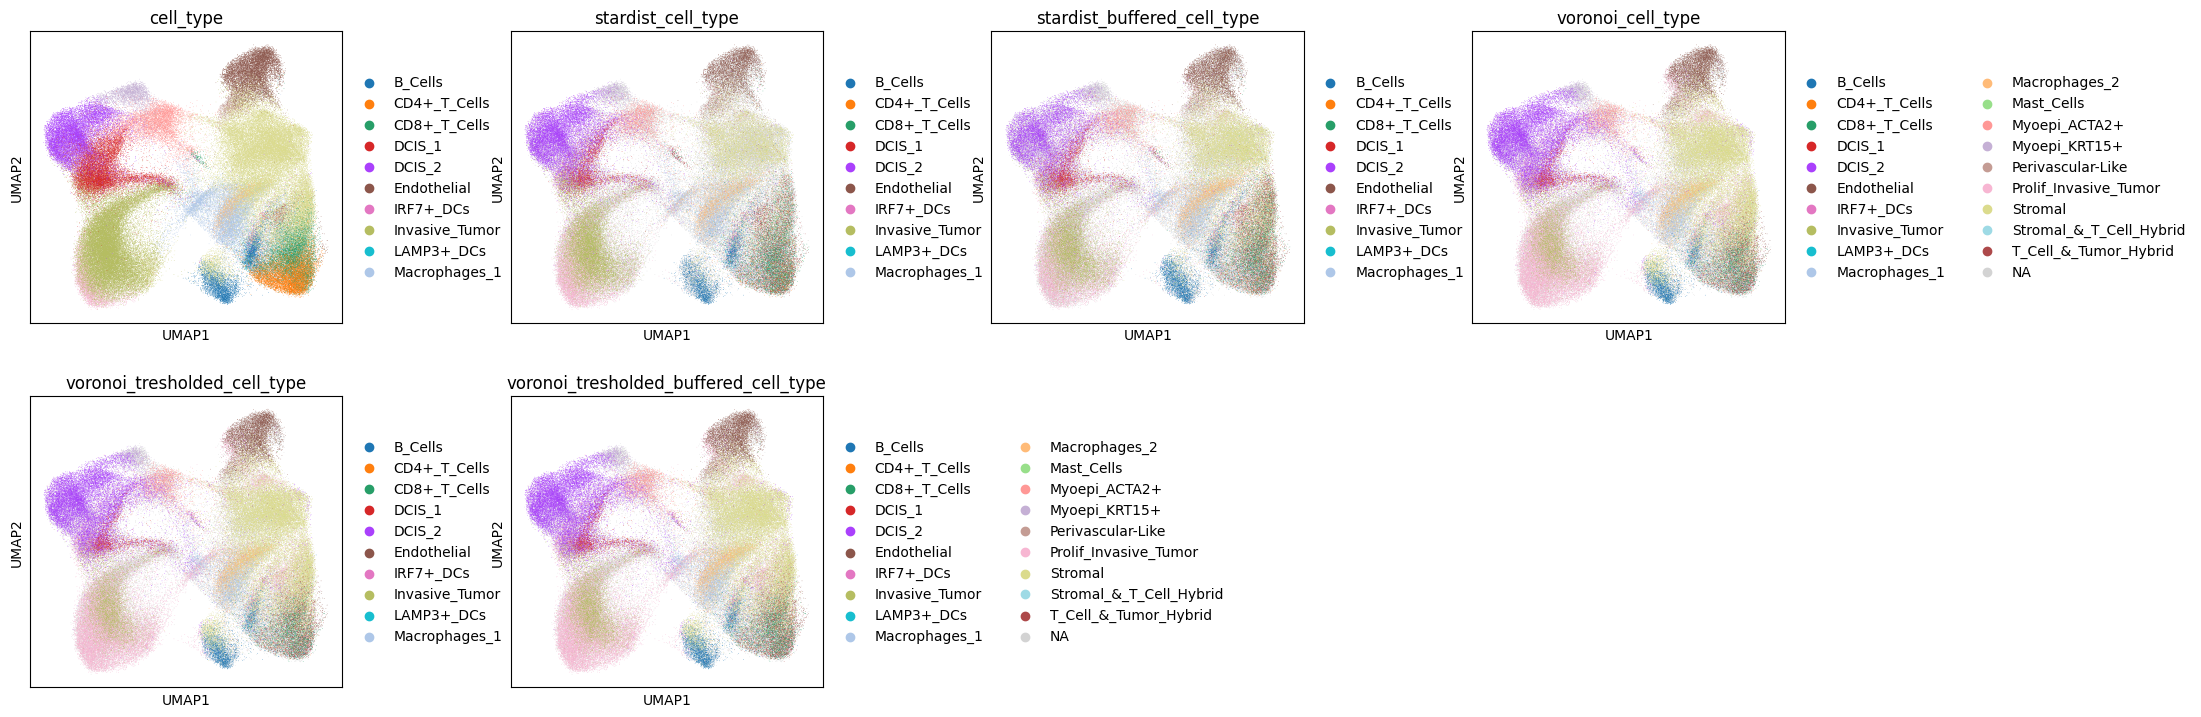

In [207]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["cell_type", 'stardist_cell_type', 'stardist_buffered_cell_type', 'voronoi_cell_type', 'voronoi_tresholded_cell_type','voronoi_tresholded_buffered_cell_type'], wspace=0.4)

In [230]:
filtered_adata = adata[adata.obs['cell_type'] == 'Prolif_Invasive_Tumor']


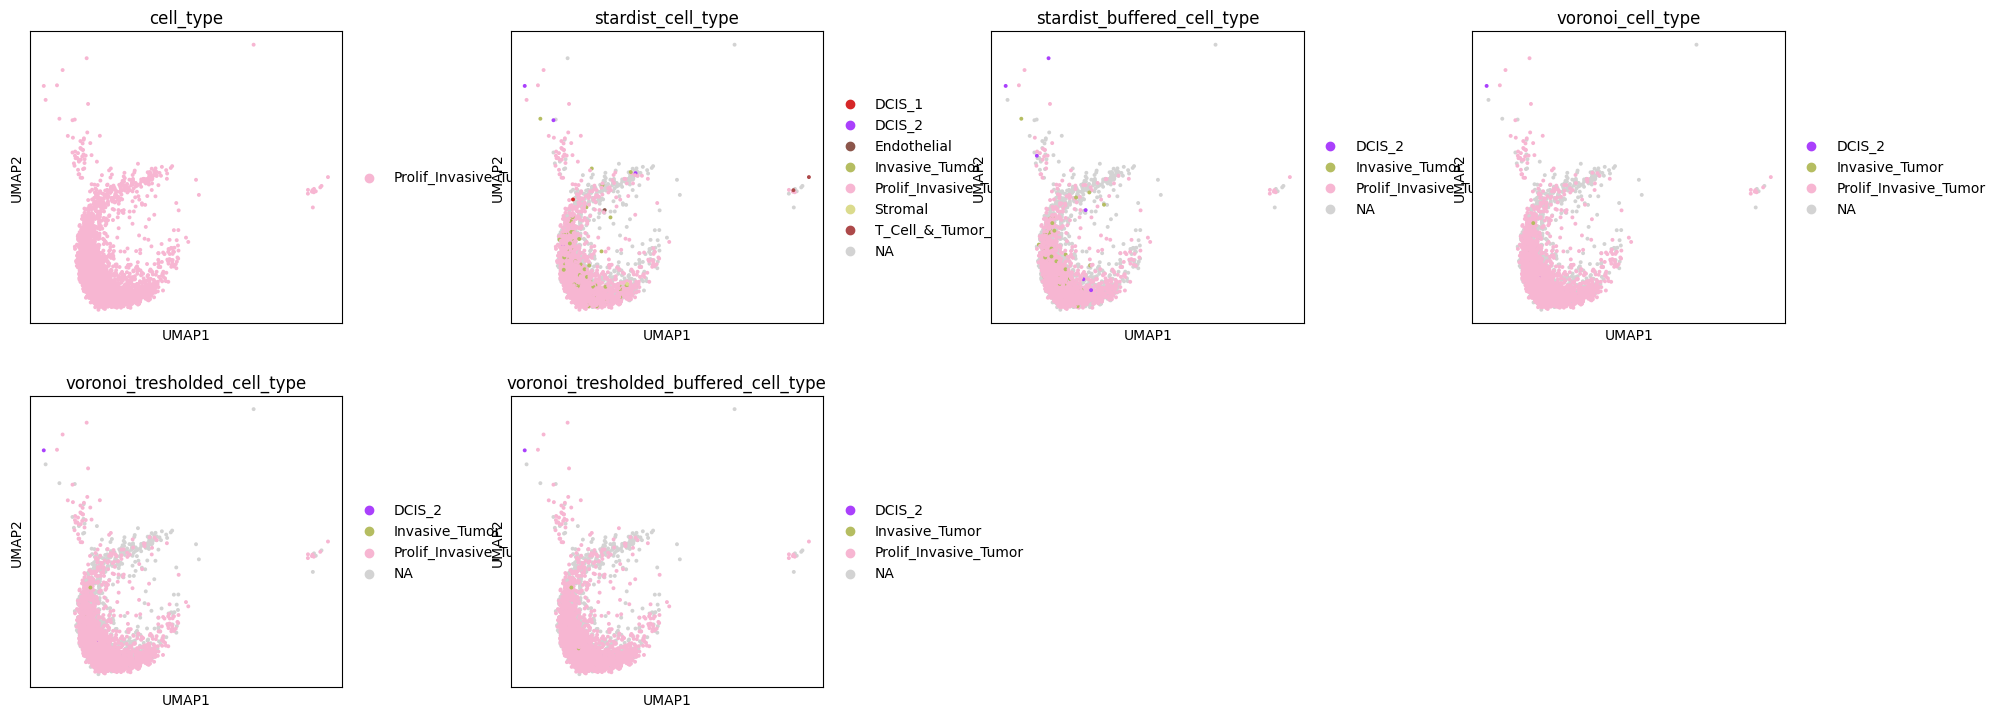

In [231]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(filtered_adata, color=["cell_type", 'stardist_cell_type', 'stardist_buffered_cell_type', 'voronoi_cell_type', 'voronoi_tresholded_cell_type', 'voronoi_tresholded_buffered_cell_type'], wspace=0.4)

In [63]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(filtered_adata.obs['cell_type'], filtered_adata.obs['stardist_cell_type'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.5062893011503468


In [64]:
filtered_adata = adata[adata.obs['voronoi_cell_type'].notna()]

In [65]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(filtered_adata.obs['cell_type'], filtered_adata.obs['voronoi_cell_type'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.5155383861317844


In [96]:
filtered_adata = adata[adata.obs['voronoi_tresholded_cell_type'].notna()]

In [98]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(filtered_adata.obs['cell_type'], filtered_adata.obs['voronoi_tresholded_cell_type'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.5182207663338105


In [165]:
filtered_adata = adata[adata.obs['voronoi_tresholded_buffered_cell_type'].notna()]

In [166]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(filtered_adata.obs['cell_type'], filtered_adata.obs['voronoi_tresholded_buffered_cell_type'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.5230798363317714


In [214]:
filtered_adata = adata[adata.obs['stardist_buffered_cell_type'].notna()]

In [215]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(filtered_adata.obs['cell_type'], filtered_adata.obs['stardist_buffered_cell_type'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.4973282502794086


In [14]:
merged_obs = voronoi_tresholded_buffered.obs[['similarity', 'CellType']].merge(
    stardist.obs[['similarity', 'CellType']], 
    left_index=True, 
    right_index=True, 
    suffixes=('_voronoi', '_stardist')
)

In [15]:
# Assign CellType based on higher similarity score
merged_obs['final_CellType'] = merged_obs.apply(
    lambda row: row['CellType_voronoi'] if row['similarity_voronoi'] >= row['similarity_stardist'] else row['CellType_stardist'], 
    axis=1
)


In [46]:
merged_obs['final_CellType']
merged_obs.index = merged_obs.index.astype(str)




In [47]:
merged_obs

,similarity_voronoi,CellType_voronoi,similarity_stardist,CellType_stardist,final_CellType
cell_id,,,,,
100.0,0.541346,DCIS_2,0.525109,DCIS_2,DCIS_2
1000.0,0.430281,DCIS_2,0.393288,DCIS_2,DCIS_2
100001.0,0.295343,Prolif_Invasive_Tumor,0.182929,Stromal,Prolif_Invasive_Tumor
100002.0,0.571593,Prolif_Invasive_Tumor,0.523739,Prolif_Invasive_Tumor,Prolif_Invasive_Tumor
100003.0,0.595968,Prolif_Invasive_Tumor,0.497543,Prolif_Invasive_Tumor,Prolif_Invasive_Tumor
...,...,...,...,...,...
99988.0,0.454050,Prolif_Invasive_Tumor,0.458002,Prolif_Invasive_Tumor,Prolif_Invasive_Tumor
99989.0,0.643138,Invasive_Tumor,0.600046,Invasive_Tumor,Invasive_Tumor
99990.0,0.583930,Invasive_Tumor,0.551751,Invasive_Tumor,Invasive_Tumor


In [45]:
voronoi_tresholded_buffered.obs.index.astype(str)

Index(['142883.0', '141638.0', '133378.0', '141054.0', '141241.0', '140869.0',
       '133911.0', '131348.0', '132969.0', '131954.0',
       ...
       '141210.0', '133954.0', '142878.0', '141294.0', '145773.0', '141635.0',
       '141055.0', '134602.0', '145875.0', '141171.0'],
      dtype='object', name='cell_id', length=106408)

In [54]:
voronoi_tresholded_buffered.obs = voronoi_tresholded_buffered.obs.merge(
    merged_obs_cleaned[['final_CellType']], 
    how='left', 
    left_on='cell_id', 
    right_index=True
)

In [52]:
# Remove duplicate rows based on index, keeping only the first occurrence
merged_obs_cleaned = merged_obs[~merged_obs.index.duplicated(keep='first')]


In [55]:
voronoi_tresholded_buffered.obs

,id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,clusters,CellType,similarity,realCellType,final_CellType
cell_id,,,,,,,,,,,,,,
142883.0,ID_100000,94,4.553877,218.0,5.389072,79.816514,100.0,100.0,100.0,6,Endothelial,0.384066,Stromal,NaN
141638.0,ID_100001,79,4.382027,394.0,5.978886,92.639594,100.0,100.0,100.0,4,DCIS_2,0.636471,DCIS_2,DCIS_2
133378.0,ID_100002,40,3.713572,72.0,4.290459,100.000000,100.0,100.0,100.0,2,Stromal,0.424661,Stromal,Stromal
141054.0,ID_100004,78,4.369448,284.0,5.652489,90.140845,100.0,100.0,100.0,4,DCIS_2,0.602728,DCIS_2,DCIS_2
141241.0,ID_100006,51,3.951244,105.0,4.663439,99.047619,100.0,100.0,100.0,2,Stromal,0.320145,Stromal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141635.0,ID_99993,87,4.477337,461.0,6.135565,91.323210,100.0,100.0,100.0,4,DCIS_2,0.615799,DCIS_2,DCIS_2
141055.0,ID_99996,80,4.394449,253.0,5.537334,88.142292,100.0,100.0,100.0,4,DCIS_2,0.532506,Myoepi_KRT15+,DCIS_2
134602.0,ID_99997,60,4.110874,114.0,4.744932,91.228070,100.0,100.0,100.0,1,Stromal,0.332396,Stromal,NaN


In [57]:
voronoi_tresholded_buffered.obs['final_CellType'] = voronoi_tresholded_buffered.obs['final_CellType'].fillna(voronoi_tresholded_buffered.obs['CellType'])


In [58]:
voronoi_tresholded_buffered.obs

,id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,clusters,CellType,similarity,realCellType,final_CellType
cell_id,,,,,,,,,,,,,,
142883.0,ID_100000,94,4.553877,218.0,5.389072,79.816514,100.0,100.0,100.0,6,Endothelial,0.384066,Stromal,Endothelial
141638.0,ID_100001,79,4.382027,394.0,5.978886,92.639594,100.0,100.0,100.0,4,DCIS_2,0.636471,DCIS_2,DCIS_2
133378.0,ID_100002,40,3.713572,72.0,4.290459,100.000000,100.0,100.0,100.0,2,Stromal,0.424661,Stromal,Stromal
141054.0,ID_100004,78,4.369448,284.0,5.652489,90.140845,100.0,100.0,100.0,4,DCIS_2,0.602728,DCIS_2,DCIS_2
141241.0,ID_100006,51,3.951244,105.0,4.663439,99.047619,100.0,100.0,100.0,2,Stromal,0.320145,Stromal,Stromal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141635.0,ID_99993,87,4.477337,461.0,6.135565,91.323210,100.0,100.0,100.0,4,DCIS_2,0.615799,DCIS_2,DCIS_2
141055.0,ID_99996,80,4.394449,253.0,5.537334,88.142292,100.0,100.0,100.0,4,DCIS_2,0.532506,Myoepi_KRT15+,DCIS_2
134602.0,ID_99997,60,4.110874,114.0,4.744932,91.228070,100.0,100.0,100.0,1,Stromal,0.332396,Stromal,Stromal


In [59]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(voronoi_tresholded_buffered.obs['realCellType'], voronoi_tresholded_buffered.obs['final_CellType'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.5242867323259902
